In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [6]:
df_ROS = pd.read_csv('../datasets/RecurrenceOfSurgery.csv')
df_ROS_data = df_ROS[['입원기간','통증기간(월)','연령','수술시간','디스크단면적','과거수술횟수','환자통증정도']]
df_ROS_data

,입원기간,통증기간(월),연령,수술시간,디스크단면적,과거수술횟수,환자통증정도
0,2,1.0,66,68.0,2048.50,0,10
1,1,1.0,47,31.0,1753.10,0,10
2,1,1.0,39,78.0,1749.00,1,7
3,1,2.0,40,73.0,1796.20,0,7
4,2,1.0,42,29.0,2021.48,0,7
...,...,...,...,...,...,...,...
1889,2,12.0,59,80.0,2652.20,0,7
1890,4,6.0,42,20.0,1795.80,0,7
1891,3,1.0,61,50.0,2624.40,0,7
1892,4,24.0,29,25.0,1972.50,0,7


## 목표변수 검증

Y : 연속형 : 단일 변수에 대한 정규성 여부 판단

    - 검증 갯수 따른 방법 선택 (레코드 갯수)
        - 5천개보다 이하 : shapiro normality test
        - 5천개보다 이상 : Anderson normality test

선정 변수: 입원기간
    
    - 분석 내용 : 입원기간이 정규 분포를 따르는가?
        - 귀무가설 : 입원기간이 정규 분포이다.
        - 대립가설 : 입원기간이 정규 분포가 아니다.

    - 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
        - 통계 결론 : pvalue=0.0이므로 대립가설 참
        - 사실 결론 : 입원기간이 정규 분포가 아니다.

<Axes: xlabel='입원기간', ylabel='Count'>

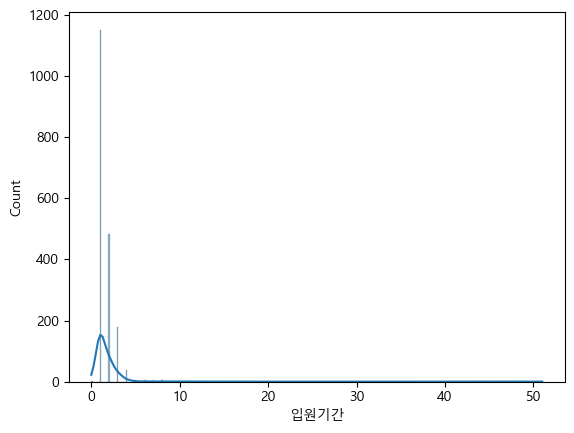

In [5]:
sns.histplot(data=df_ROS_data, x='입원기간', kde=True)

In [7]:
df_ROS_data.isnull().sum()

입원기간        0
통증기간(월)     4
연령          0
수술시간       54
디스크단면적      1
과거수술횟수      0
환자통증정도      0
dtype: int64

In [28]:
df_ROS_data=df_ROS_data.dropna()
df_ROS_data

,입원기간,통증기간(월),연령,수술시간,디스크단면적,과거수술횟수,환자통증정도
0,2,1.0,66,68.0,2048.50,0,10
1,1,1.0,47,31.0,1753.10,0,10
2,1,1.0,39,78.0,1749.00,1,7
3,1,2.0,40,73.0,1796.20,0,7
4,2,1.0,42,29.0,2021.48,0,7
...,...,...,...,...,...,...,...
1889,2,12.0,59,80.0,2652.20,0,7
1890,4,6.0,42,20.0,1795.80,0,7
1891,3,1.0,61,50.0,2624.40,0,7
1892,4,24.0,29,25.0,1972.50,0,7


In [29]:
stats.shapiro(df_ROS_data['입원기간'])
# ShapiroResult(statistic=0.2543339729309082, pvalue=0.0  : 0.05이하 대립가설 참)

ShapiroResult(statistic=0.2564329504966736, pvalue=0.0)

## 설명변수 검증
- '통증기간(월)','연령','수술시간','디스크단면적','과거수술횟수','환자통증정도'


#### X : 연속형 / Y : 연속형  = 주로 상관관계 확인에서 사용
    - correlation coefficient(상관계수)
    - 1 ~ 1
    - 0에 가까우면 관계없음, -1로 갈수록 반비례, 1로 갈수로 정비례

In [30]:
df_ROS_data[['과거수술횟수','환자통증정도']] = df_ROS_data[['과거수술횟수','환자통증정도']].astype(object)
df_ROS_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835 entries, 0 to 1893
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   입원기간     1835 non-null   int64  
 1   통증기간(월)  1835 non-null   float64
 2   연령       1835 non-null   int64  
 3   수술시간     1835 non-null   float64
 4   디스크단면적   1835 non-null   float64
 5   과거수술횟수   1835 non-null   object 
 6   환자통증정도   1835 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 114.7+ KB


In [31]:
df_ROS_data.describe().corr()

,입원기간,통증기간(월),연령,수술시간,디스크단면적
입원기간,1.000000,0.985875,0.999810,0.996890,0.033654
통증기간(월),0.985875,1.000000,0.985910,0.994538,0.145318
연령,0.999810,0.985910,1.000000,0.997478,0.048057
수술시간,0.996890,0.994538,0.997478,1.000000,0.102975
디스크단면적,0.033654,0.145318,0.048057,0.102975,1.000000


#### 선정 변수: 입원기간, 연령
- 분석 내용 : 연령이 길어 지면 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 연령에 따라서 입원기간 변화가 없다.
    - 대립가설 : 연령에 따라서 입원기간 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 대립가설 참, 상관계수 관계 없음
    - 사실 결론 : 연령에 따라서 입원기간 변화가 있다.
    SignificanceResult(statistic=0.06940175801675036, pvalue=0.0025109193902937083)

In [37]:
# 컬럼 중 하나라도 비정규 분포이면 사용
stats.spearmanr(df_ROS_data['입원기간'], df_ROS_data['연령'])

SignificanceResult(statistic=0.06038210387356791, pvalue=0.009676490242860429)

#### 선정 변수: 입원기간, 디스크 면적
- 분석 내용 :디스크 단면적 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 디스크 단면적과 입원 기간 간에 상관관계가 없다.
    - 대립가설 : 디스크 단면적과 입원 기간 간에 상관관계가 있다
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참,
    - 사실 결론 : 디스크 면적에 따라서 입원기간 변화가 있다.
    SignificanceResult(statistic=0.029330390035971116, pvalue=0.20917506925393334)

In [1]:
stats.spearmanr(df_ROS_data['입원기간'], df_ROS_data['디스크단면적'])

NameError: name 'stats' is not defined

'MDCARE_STRT_DT','ED_RC_TOT_AMT'#### 선정 변수: 입원기간, 통증기간
- 분석 내용 :통증기간 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 통증기간과 입원 기간 간에 상관관계가 없다.
    - 대립가설 : 통증기간과 입원 기간 간에 상관관계가 있다
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참,
    - 사실 결론 : 통증기간에 따라서 입원기간 변화가 있다.
    SignificanceResult(statistic=0.01809521553576732, pvalue=0.43852985385366017)

In [39]:
stats.spearmanr(df_ROS_data['입원기간'], df_ROS_data['통증기간(월)'])

SignificanceResult(statistic=0.01809521553576732, pvalue=0.43852985385366017)

#### 선정 변수: 입원기간, 수술시간
- 분석 내용 : 수술시간에 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 수술시간과 입원 기간 간에 상관관계가 없다.
    - 대립가설 : 수술시간과 입원 기간 간에 상관관계가 있다
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참,
    - 사실 결론 : 수술시간에 따라서 입원기간 변화가 있다.
    SignificanceResult(statistic=0.0028694592438545494, pvalue=0.9022375735171032)

In [40]:
stats.spearmanr(df_ROS_data['입원기간'], df_ROS_data['수술시간'])

SignificanceResult(statistic=0.0028694592438545494, pvalue=0.9022375735171032)